# Análise Saneamento Básico e Educação Básica no Rio Grande do Sul e em Pernambuco

### Introdução

A desigualdade no nível de saneamento básico é um grande problema no Brasil, segundo Bovolato(2010) "Embora   avanços   tenham  acontecido   nos   últimos   anos,   existe   uma   enorme desigualdade  na  oferta  destes  serviços  no  Brasil . **Nesta análise examinares essa diferença entre os estados do Rio Grande do Sul e Pernambuco**, que pertencem a regiões com diferentes níveis de saneamento e iremos verificar estatísticamente a afirmação de Bovolato. É importante mencionar que saneamento básico é um conceito mais amplo que apenas acesso a água potável e esgoto tratado ,mas essas duas métricas ja nos darão uma boa compreensão do saneamento básico da região.

Também olharemos taxa de empregados com ensino fundamental completo. Segundo Rocha(2014) a escolarização massiva é um grande objetivo da sociedado visto que é uma necessidade para desenvolvimento espiritual e material dos indvíduos e da sociedade. A escolarização massiva se refere principalmente ao ensino fundamental e ensino médio, mas nesta análise olharemos apenas a porcentagem de empregados com ensino fundamental completo.

Quanto a estrutura da análise, todas explicações referentes ao código estão dentro das células de códigos e todo o resto está fora delas. Logo, o leitor que não tiver interesse em programação não precisa olhar o código em nenhum momento. Porém, ao leitor que se interessar pelo código, todo ele estará explicado de modo compreensivo. 

### Explicação das Tabelas
Iremos utilizar dois conjuntos de dados retiradas do site [Atlas Brasil](http://www.atlasbrasil.org.br/consulta) (site referência quanto a dados demográficos no Brasil). Ambas as tabelas apresentam as mesmas colunas, elas seriam:
- Territorialidade (nome da cidade).
- % dos ocupados com ensino fundamental completo.
- % da população que vive em domicílios com banheiro e água encanada.

Importante notar que o Rio Grande do Sul possui mais cidades que Pernambuco, portanto a sua tabela é significativamente maior.
Com isso, podemos começar a organizar as tabelas com Python.

In [37]:
# importando as biblioteca necessárias e dando apelidos para facilitar escrever o código
import numpy as np # biblioteca por trás do Pandas https://numpy.org/
import pandas as pd # principal biblioteca do projeto, usada para o tratamento de tabelas https://pandas.pydata.org/
import scipy as sp # biblioteca com funções matemáticas úteis (não utilizei tanto na análise) https://scipy.org/

import matplotlib.pyplot as plt # biblioteca para construir gráficos https://matplotlib.org/
import seaborn as sns # biblioteca para facilitar a construção de gráfics com matplotlib https://seaborn.pydata.org/

# mostra os gráficos abaixo da célula em que forem criados
%matplotlib inline 

In [2]:
# escolhendo o estilo de todos gráficos da análise
sns.set_style('white')

# lendo as bases de dados que estão em formato .xlsx, ambas retiradas do site Atlas Brasil
rs_df = pd.read_excel("dados_RS.xlsx")
pe_df = pd.read_excel("dados_PE.xlsx")

In [3]:
rs_df.info()
pe_df.info()
"""
Observe que as data_frames ja estão limpas. Sem nenhuma linha com valores null e com os tipos de dados corretos. Note que o tipo 
da coluna territorialidades é object, mas é assim que a biblioteca Numpy representa string. Isso acontece porque strings são 
dinamicamente alocadas em memória e portanto não são um tipo de dado nativo. Resumidamente, as tabelas ja estão organizadas.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Territorialidades                                                        495 non-null    object 
 1   % dos ocupados com ensino fundamental completo 2010                      495 non-null    float64
 2   % da população que vive em domicílios com banheiro e água encanada 2010  495 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Territorialidades   

In [4]:
# mudando o index de cada coluna para o nome da cidade para tornar a tabela mais limpa
rs_df = rs_df.set_index("Territorialidades")
pe_df = pe_df.set_index("Territorialidades")

In [5]:
# escrevendo um dicionário para evitar escrever todo o nome da coluna sempre que precisar chamá-la, apenas uma mão na roda
# sempre que ver estado_df[cols[cols[número]]] e porque estou usando esse dicionário
cols = {1:"% dos ocupados com ensino fundamental completo 2010",
         2:"% da população que vive em domicílios com banheiro e água encanada 2010"}

## Análise dos histogramas

#### Legenda

Para facilitar a identificação dos gráficos, uma cor será designada para os gráficos de cada estado, logo, quando o leitor ver o gráfico saberá rapidamente a qual estado o gráfico se refere.

In [41]:
%%html
<div style="display: flex;">
  <div style="width: 50px; height: 50px; background-color: #FF1493; margin-right: 10px;margin-bottom:10px"></div>
  <span>Rio Grande do Sul</span>
</div>

<div style="display: flex;">
  <div style="width: 50px; height: 50px; background-color: #660066; margin-right: 10px;"></div>
  <span>Pernambuco</span>
</div>

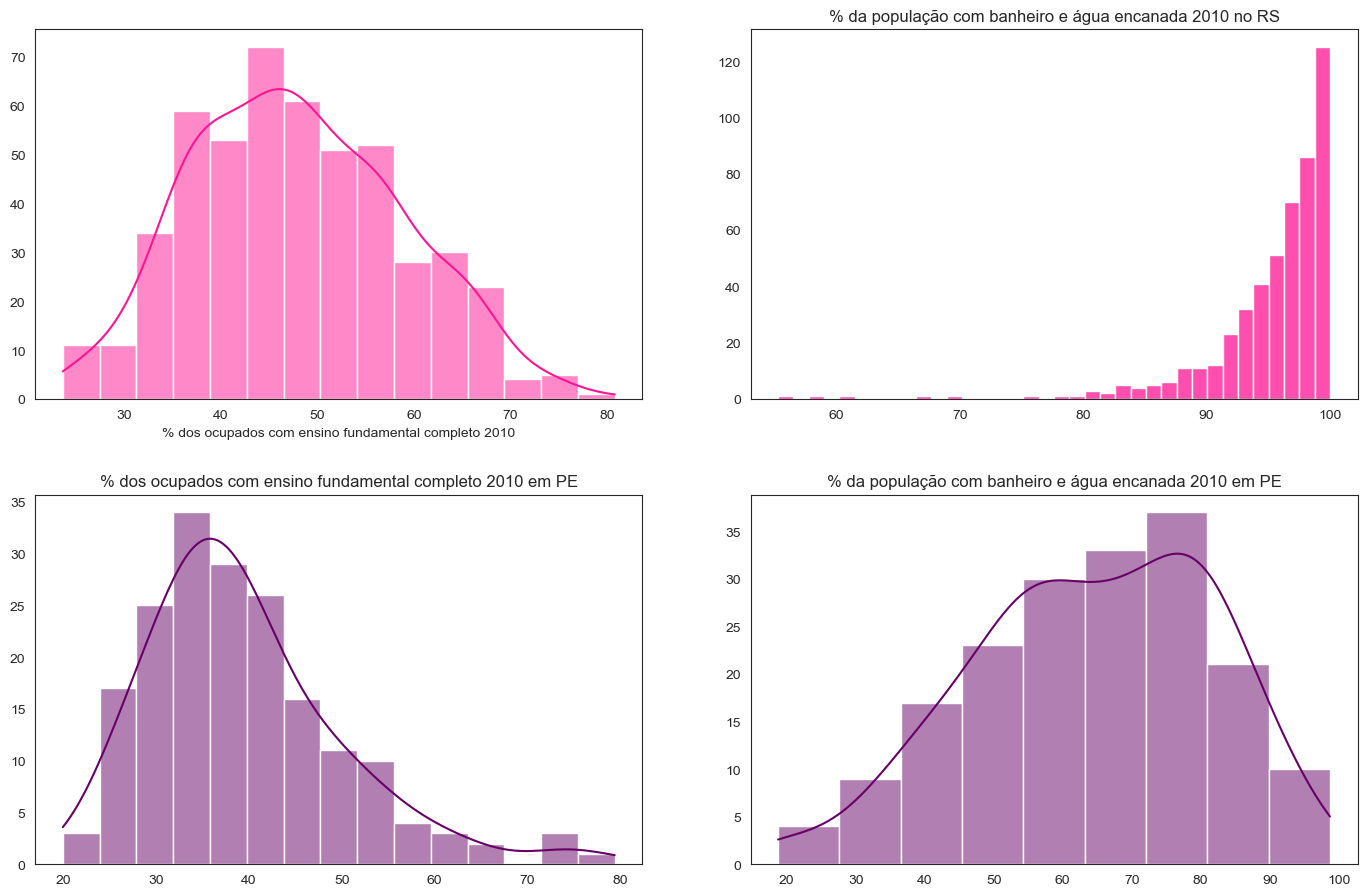

In [44]:
# Definindo as cores padrões que ja mostrei antes nos quadrados, assim posso chamar stdcolor_ ao invés de digitar o código HEX
stdcolor1 ="#660066"
stdcolor2 ="#FF1493"

# Criando os 4 espaços para os gráficos e definindo o tamanho da janela
fig, ax = plt.subplots(2,2,figsize=(15,10))

# Colocando uma margem entre eles para os títulos aparecerem melhor
fig.subplots_adjust(hspace=0.125, wspace=0.125)
plt.tight_layout(pad=5)

# Plotando os gráficos utilizando o sns.histplot https://seaborn.pydata.org/generated/seaborn.histplot.html
rs1 = sns.histplot(data = rs_df[cols[1]],ax = ax[0,0], color=stdcolor2, kde=True)
rs1.set(xlabel=None,ylabel=None, title="% dos ocupados com ensino fundamental completo 2010 no RS")

rs2 = sns.histplot(data = rs_df[cols[2]], ax = ax[0,1], color = stdcolor2)
rs2.set(xlabel=None, ylabel=None, title="% da população com banheiro e água encanada 2010 no RS")

pe1 = sns.histplot(data = pe_df[cols[1]],ax = ax[1,0], color=stdcolor1, kde=True)
pe1.set(xlabel=None,ylabel=None, title="% dos ocupados com ensino fundamental completo 2010 em PE")

pe2 = sns.histplot(data = pe_df[cols[2]], ax = ax[1,1], color = stdcolor1, kde=True)
pe2.set(xlabel=None, ylabel=None, title="% da população com banheiro e água encanada 2010 em PE");

Há análises importantes para serem feitas olhando apenas esses histogramas. Primeiramente, note que, **sem ser o gráfico da porcentagem da população com banheiro e água encanada em 2010 no RS, todos os outros seguem, aproximadamente, uma distribuição normal**, com a maioria dos valores concentrados no meio do gráfico. O claro destaque, porém, é o gráfico da segunda coluna do RS pois não segue distribuição normal, vamos olhar a média e mediana de cada um dos gráficos para termos uma noção melhor da distribuição dos dados (abreviei ensino fundamental completo para EFC e saneamento básico para SB). 

### Média e mediana

In [8]:
# Crio essas tabelas pequenas porque a visualização das tabelas pandas em Jupyter Notebooks é excelente
# De qualquer modo, é questionável se havia a necessidade de definir uma nova tabela apenas para isso
rs_mm = pd.DataFrame({"% EFC 2010 no RS": [rs_df[cols[1]].mean(), rs_df[cols[1]].median()],"% SB 2010 no RS": [rs_df[cols[2]].mean(), rs_df[cols[2]].median()]})
rs_mm = rs_mm.set_axis(["Média", "Mediana"])
rs_mm

,% EFC 2010 no RS,% SB 2010 no RS
Média,47.925798,95.342101
Mediana,46.990000,96.870000


In [9]:
pe_mm = pd.DataFrame({"% EFC 2010 em PE": [pe_df[cols[1]].mean(), pe_df[cols[1]].median()],"% SB 2010 em PE": [pe_df[cols[2]].mean(), pe_df[cols[2]].median()]})
pe_mm = pe_mm.set_axis(["Média", "Mediana"])
pe_mm

,% EFC 2010 em PE,% SB 2010 em PE
Média,39.420435,64.31212
Mediana,37.595000,65.85500


A mediana da porcentagem de saneamento básico em 2010 no RS é 96,87%, um valor extremamente alto Isso explica a concentração extrema dos valores nas classes mais altas do histograma. Isso nos leva a concluir que **o saneamento básico no Rio Grande do Sul é muito bom**, o que era de se esperar visto que em geral o saneamento básico no sul do Brasil é excelente. Por outro lado **a mediana do saneamento básico em Pernambuco é baixa**, apenas de 65,85%, o que reflete a afirmação de Bovolato sobre a disparidade de acesso a água potável e água encanada dependendo da região do país.

Interessantemente **a disparidade quanto a porcentagem de ensino fundamental completo é significativamente menor que a de saneamento básico**, com a média diferindo por apenas 8 pontos percentuais. Isso pode ser um reflexo do foco que o governo vem dando na obrigação das crianças completarem o ensino fundamental. Possívelmente esta diferença pequena nas médias não indica que o nível escolar seja similar entre os dois estados, apenas que um número de crianças similar vai a escola. Fundamentalmente esta estatística pública não leva em consideração a qualidade do ensino escolar. De qualquer modo, a diferença entre a porcentagem de empregados com ensino fundamental completo entre os dois estados é menor que a diferença em saneamento básico.

## Analisando a correlação entre as duas métricas

As duas métricas são afetadas pelo nível de desenvolvimento geral da cidade, logo, espera-se que haja uma correlação forte entre elas. Porém, Porto Alegre é a cidade com maior porcentagem de ocupados com ensino fundamental completo no RS e não está entre as cinco cidades com melhor saneamento básico. A correlação não é tão simples. Para determinarmos a força e direção desta correlação usaremos o Coeficiente de Pearson.

In [24]:
# A função .corr da biblioteca numpy foi usada para calcular o Coeficiente de Correlação de Pearson
print(f"P de Pearson RS: {rs_df[cols[1]].corr(rs_df[cols[2]]):.4f}\nP de Pearson PE: {pe_df[cols[1]].corr(pe_df[cols[2]]):.4f}")

P de Pearson RS: 0.3614
P de Pearson PE: 0.6453


Vemos que a correlação é muito mais forte em Pernambuco que no Rio Grande do Sul. Mas isso se deve mais ao que observamos previamente de a mediana da porcentagem de casas com água potável e esgoto encanada ser 96,87% no RS. Isso faz com que, **no Rio Grande do Sul, mesmo que a cidade tenha um nível de educação baixo, ela não necessáriamente tenha um nível de saneamento básico baixo**.

Por outro lado, **a relação é relativamente forte em Pernambuco**, o que faz sentido visto que ambas as métricas seguem uma distribuição normal naquele estado. Portanto, nas cidades de Pernambuco, aquelas que possuem melhores níveis de saneamento básico apresentam um nível de educação significativamente mais elevado do que aquelas com níveis baixos, o que não era verdade no RS.

### Linhas de regressão

Para melhor visualização da correlação entre as duas métricas foram construídos os gráficos de dispersão para ambos os estados. Também foram posicionadas as linhas de regressão com seus respectivos intervalos de confiança.

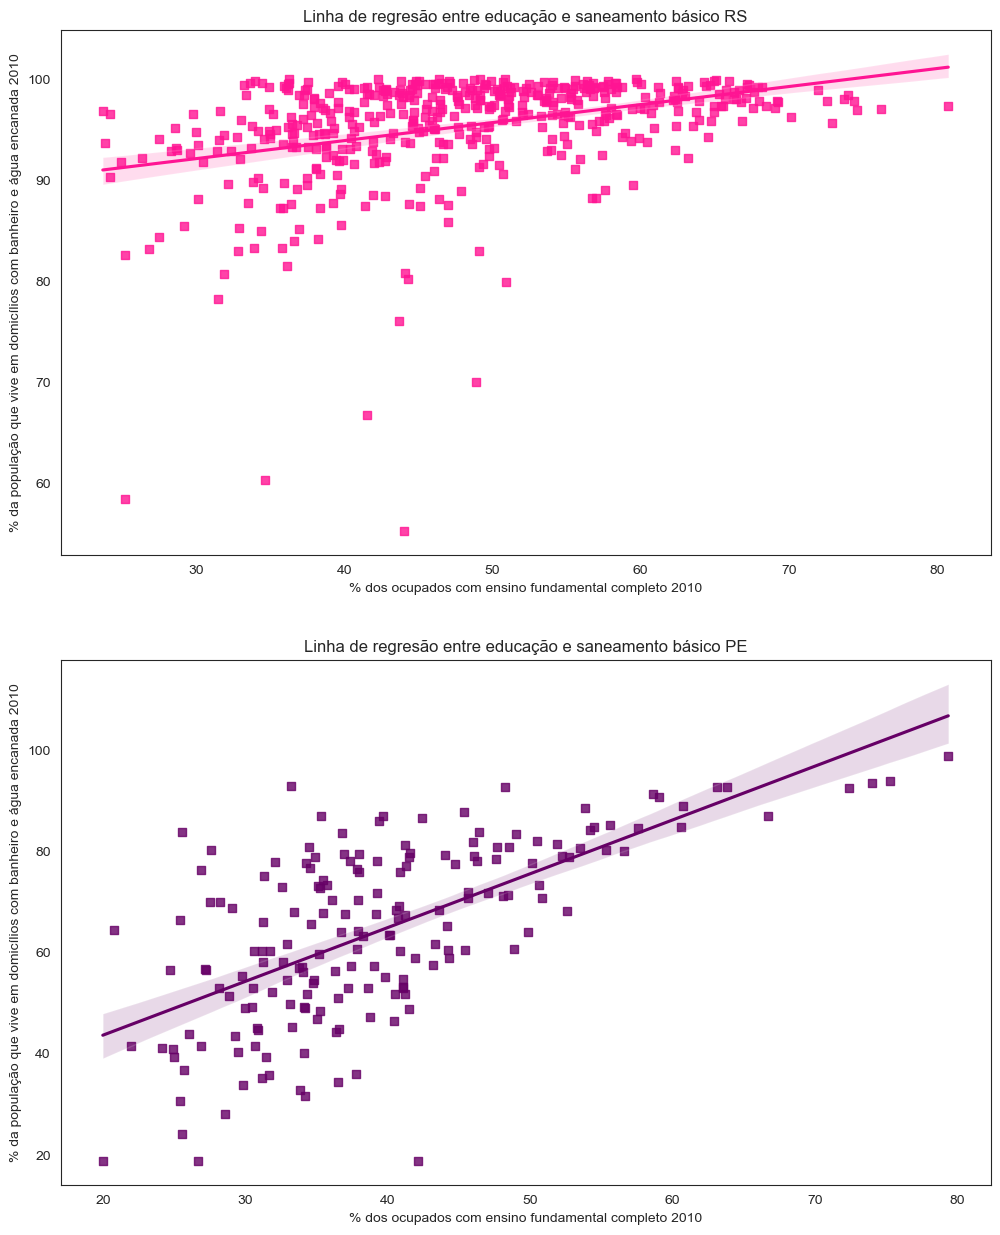

In [26]:
# Criando os 2 espaços para os gráficos e definindo o tamanho da janela
fig,ax = plt.subplots(2,1, figsize = (12,15))

# Plotando os gráficos utilizando sns.regplot  https://seaborn.pydata.org/generated/seaborn.regplot.html
rs4 = sns.regplot(x=rs_df[cols[1]], y=rs_df[cols[2]], ax=ax[0], marker = 's', color = stdcolor2)
rs4.set(title = "Linha de regresão entre educação e saneamento básico RS")

pe4 = sns.regplot(x=pe_df[cols[1]], y=pe_df[cols[2]], ax=ax[1], marker = 's', color = stdcolor1)
pe4.set(title = "Linha de regresão entre educação e saneamento básico PE");

Olhando o gráfico fica mais claro quão alto é o nível de saneamento básico no RS e porque o coeficiente de Pearson foi baixo. **Basicamente todas cidades do RS tem um nível alto de banheiro e água encanada**.

Também gostaria de chamar atenção do leitor para como o intervalo de confiança da linha de regressão é bem menor no RS que em PE. Isso ocorre, principalmente, porque o Rio Grande do Sul simplesmente tem mais cidades que Pernambuco. Outra razão provável para o menor intervalo de confiança é como os pontos no gráfico do RS estão extremamente agrupados nos valores altos de saneamento básico.  

## Definição do IGESB

A observação das duas métricas separadamente trouxe conclusões importantes, mas, uma métrica que combine as duas estatística publicas ajudaria a comparar e ranquear cidades de modo mais simples. Com isso **proponho a criação de um indicador novo que leve em conta tanto a porcentagem de empregados com ensino fundamental completo quanto o saneamento básico do estado. Seu nome será IGESB** (Indicador geral de educação e saneamento básico, definido a partir da seguinte fórmula: 

$$IGESB = \sqrt{\text{% de empregados com ensino fundamental completo} \times \text{% da população que vive em domicílios com banheiro e água encanada}}$$

Que é apenas a média geométrica das duas estatísticas públicas. A média geométrica foi escolhida pois ela pune estados com um saneamento básico excelente mas péssima taxa de ensino fundamental completo e vice-versa. Isso fará com que apenas estados com ambam estatísticas públicas altas tenham altos IGESB's. Podemos olhar os 5 maiores e 5 menores IGESB's do Rio Grande do Sul e de Pernambuco para termos uma noção da medida nesses estados.

In [34]:
# Adicionando o IGESB as tabelas utilizando a fórmula acima

# Para isso criei um objeto pd.Series com todos os IGESB's dos dois estados e depois adicionei nas DataFrames
MG_col1_col2_rs = np.sqrt(rs_df[cols[1]]*rs_df[cols[2]])
rs_df["IGESB"] = MG_col1_col2_rs
# Poderia ser feito assim também rs_df["IGESB"] = np.sqrt(rs_df[cols[1]]*rs_df[cols[2]])

MG_col1_col2_pe = np.sqrt(pe_df[cols[1]]*pe_df[cols[2]])
pe_df["IGESB"] = MG_col1_col2_pe

# Adicionando ao nosso dicionário mão na roda a nova coluna
cols[3] = "IGESB"

In [33]:
# 5 Maiores e 5 menores IGESBs do Rio Grande do Sul

"""
Faço isso primeiro usando pd.sort_values com ascending = False para os valores serem colocados em ordem descrescente
Depois uso pd.drop para mostrar apenas a coluna IGESB quando printo a DataFrame
Como pd.drop não trabalha com ponteiros, ela não remove mesmo as colunas da DataFrame, apenas retorna uma cópia sem as colunas
"""
rs_df.sort_values(by=[cols[3]], ascending=False).drop([cols[1],cols[2]], axis=1)

,IGESB
Territorialidades,
Porto Alegre (RS),88.686055
Cachoeirinha (RS),86.004267
Esteio (RS),85.341000
Caxias do Sul (RS),85.301587
Santa Maria (RS),85.055329
...,...
Herveiras (RS),47.249596
Barão do Triunfo (RS),46.744868
São Valério do Sul (RS),45.730796


In [35]:
# 5 Maiores e 5 menores IGESBs de Pernambuco

# Mesmo procedimento explicado na célula do RS
pe_df.sort_values(by=[cols[3]],ascending = False).drop([cols[1],cols[2]], axis=1)

,IGESB
Territorialidades,
Fernando de Noronha (PE),88.527891
Paulista (PE),84.082842
Recife (PE),83.156169
Olinda (PE),81.859774
Abreu E Lima (PE),76.901151
...,...
Carnaubeira da Penha (PE),28.123328
Iati (PE),27.958272
Caetés (PE),24.794693


### Gráficos do IGESB

Tendo em mãos este novo indicador, iremos analisar o quadro dele em cada um dos estados. Para isso utilizaremos, novamente, um histograma.

A média do IGESB no Rio grande do sul é 67.21 com Desvio Padrão de 8.57

A média do IGESB em Pernambuco é 50.00 com Desvio Padrão de 12.40


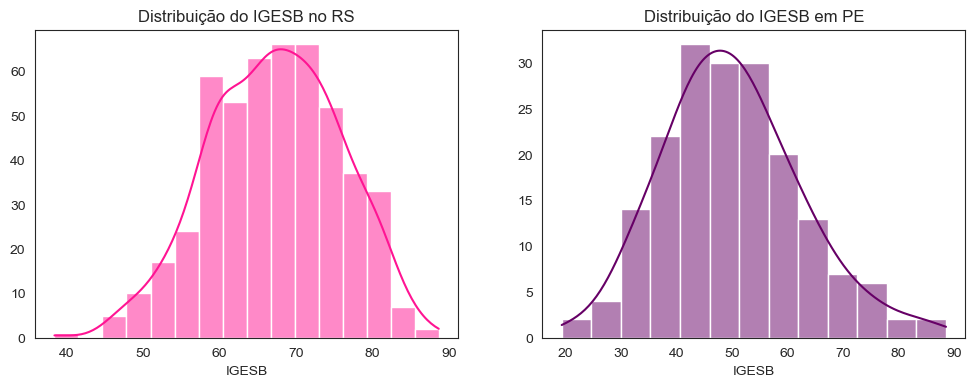

In [15]:
# Criando gráficos de distribuição de frequência para o IGESB

# Criando os 2 espaços para os gráficos e definindo o tamanho da janela
fig,ax = plt.subplots(1,2, figsize=(12,4))

# Novamente usando sns.histplot
rs3 = sns.histplot(data=rs_df[cols[3]], ax = ax[0], color=stdcolor2, kde=True)
rs3.set(ylabel=None, title = "Distribuição do IGESB no RS")

pe3 = sns.histplot(data=pe_df[cols[3]], ax = ax[1], color=stdcolor1, kde=True)
pe3.set(ylabel = None, title = "Distribuição do IGESB em PE");

# Print das médias e medianas 
# Seria mais eficiente computacionalmente ter usado a tabela rs_mm e pe_mm mas assim é o código é mais simples (acho)
print(f"""A média do IGESB no Rio grande do sul é {rs_df[cols[3]].mean():.2f} com Desvio Padrão de {np.std(rs_df[cols[3]]):.2f}\n
A média do IGESB em Pernambuco é {pe_df[cols[3]].mean():.2f} com Desvio Padrão de {np.std(pe_df[cols[3]]):.2f}"""
)

Note como a média do IGESB no Rio Grande do Sul é maior que em Pernambuco, possuindo desvio padrão menor. Isso nos leva a concluir definitivamente que, quanto aos dados analisados, **o Rio Grande do Sul possúi métricas melhores que Pernambuco.**

Também é curioso que, mesmo com o saneamento básico no RS não seguindo uma distribuição normal, **a distribuição do IGESB de ambos os estados é aproximada pela distribuição normal** (isso também é efeito de usarmos a média geométrica na definição do IGESB).

É extremamente importante comentar que o IGESB tem limitações severas. Primeiramente ele leva em conta apenas dois dados, então mesmo sendo chamado de Indicador Geral de Educação e Saneamento Básico, ele leva pouquíssimo dados em conta. Essa é uma limitação da análise de apenas duas tabelas com duas colunas cada. Um indicador (possivelmente um índice) muito mais completo poderia ser feita com a utilização de mais dados. Primeiramente educação precisa ser medida por vários níveis para se ter um quadro completo, similar com o que é feito para o cálculo do IDHM. Segundamente o saneamento básico não é bem representado apenas com a porcentagem de casas com água potável e esgoto encanado. Seria necessário uma métrica para medir, por exemplo, o nível de controle de vetores de doenças transmissíveis (como roedores). De qualquer modo o IGESB nos leva a conclusões significativas com a quantidade limitada de dados usada na análise.

## Conclusões

O Rio Grande do Sul tem uma altíssima porcentagem de casas com água e esgoto encanado. **A afirmação de Bovolato de que existe uma grande disparidade no saneamento básico entre regiões do Brasil se mostrou verdadeira para o RS e Pernambuco**, visto que as médias nessa estatística pública se diferenciam em 30 pontos percentuais entre os dois estados. **A diferença entre as médias da porcentagem de empregados com ensino fundamental completo é muito menor**, de apenas 8 pontos percentuais entre os dois estados. 

O indicador IGESB segue uma distribuição normal em ambos estados, sendo que tem média de 67.21% e Desvio Padrão de 8.57% no RS e média de 50.00% com Desvio Padrão de 12.40% em PE. Isso nos leva a concluir que **o Rio Grande do Sul tem um quadro melhor de saneamento básico e educação que Pernambuco**.

### Considerações finais

É importante comentar que os dados usados nessa análise são de 2010 .Junto a isso devemos considerar que a estatística pública porcentagem de empregados com ensino fundamental completo é pouco sensível a mudanças, é provável que de 2010 a 2023 o quadro dessa métrica tenha melhorado em ambos os estados.

A análise poderia ser mais completa com a utilização de mais dados, especialmente no que diz respeito ao indicador IGESB. Um plano futuro será tornar esse indicador algo similar ao IDHM, mas com um enfoque diferente. Também é plano futuro completar a análise com um aprofundamente estatístico teórico nos dados, algo que não possuo o conhecimento para fazer no momento.

#### Artigos citados

BOVOLATO, L. E. SANEAMENTO BÁSICO E SAÚDE. Revista Escritas, [S. l.], v. 2, 2015. DOI: 10.20873/vol2n0pp%p. Disponível em: https://sistemas.uft.edu.br/periodicos/index.php/escritas/article/view/1145. Acesso em: 20 maio. 2023.

da Rocha, Idnelma Lima. "O Ensino Fundamental no Brasil–uma análise da efetivação do direito à educação obrigatória." (2014)